<a href="https://colab.research.google.com/github/Paospina0718/Programming-Assignment-2-Lexical-Scoping/blob/main/TALLER_3_DISE%C3%91O(Ospina%20y%20Pecha).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Taller #3- Práctica Phyton
Julián Esteban Pecha y Paola Andrea Ospina 

El siguiente conjunto de datos agronómicos permite usar la misma entrada para ajustar diferentes modelos haciendo uso esta vez del programa Python usando cualquier plataforma. 
La matriz de datos contiene las variables
y: latitud
x:Longitud
SMI: Índice de humedad del suelo
NDVI: Indice de vegetación de diferencia normalizado
LST: Temperatura en la superficie del suelo
El siguiente código en R representa el conjunto de datos


In [ ]:
import random 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy 
import folium
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as st
from mpl_toolkits import mplot3d
from scipy.stats import shapiro
from scipy.stats import levene
from scipy.spatial.distance import cdist
from statsmodels.formula.api import ols

In [ ]:
#Transformación código
random.seed(1007355141)
Seqlat= np.arange(-73.30,-73.25,0.001)
Seqlong=np.arange(5.54,5.58,0.001)
Latitude=pd.DataFrame.sample(pd.DataFrame(Seqlat),100, replace=True)
Latitude=list(Latitude[0])
Longitude=pd.DataFrame.sample(pd.DataFrame(Seqlong),100, replace=True)
Longitude=list(Longitude[0])

# Dataframe 1
xy=pd.DataFrame({"Lat":Latitude, "Long":Longitude})

# Dataframe 2 
SMI= np.partition(np.random.uniform(0.7,0.95,100),10)
NDVI= np.partition(np.random.uniform(0.45,0.06,100),10)
LST= np.partition(26*scipy.stats.beta.rvs(0.87,0.91,size=100),10)

# Dataframe 3
df1 = pd.DataFrame({'Lat': Latitude, 'Long': Longitude, 'SMI':SMI, 'NDVI':NDVI,'LST':LST})
df1["Posición"]=np.arange(len(df1))

Aquí se pueden observar las transformaciones correspondientes al código de R, así mismo los data frames.

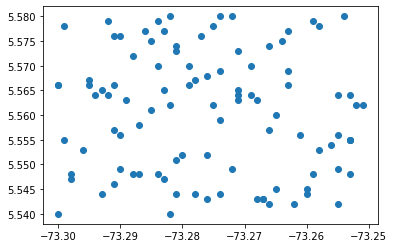

In [ ]:
# Nube de datos 
plt.plot(df1['Lat'], df1['Long'], 'o')
plt.show()

Aquí podemos observar la nube de datos correspondiente al dataframe 3, teniendo en cuenta los valores de latitud y longitud. Así mismo se puede evidenciar una dispersión alta de los datos, ya que no presentan ninguna tendencia.

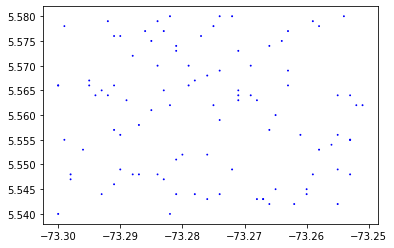

In [ ]:
# Asignar al gráfico un tamaño al punto de acuerdo con el SMI (graficar)
plt.scatter(df1['Lat'],df1['Long'],marker="o", c="b",s=df1["SMI"])
plt.show()

En esta nube de puntos, se observa una disminución del tamaño con respecto al gráfico anterior.

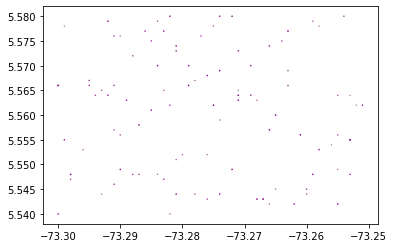

In [ ]:
# Asignar al gráfico un color al punto de acuerdo con el NDVI (graficar)
plt.scatter(df1['Lat'],df1['Long'], color="purple",s=df1["NDVI"])
plt.show()

En esta gráfica se observa un cambio en la coloración de los puntos, a tonalidad morada

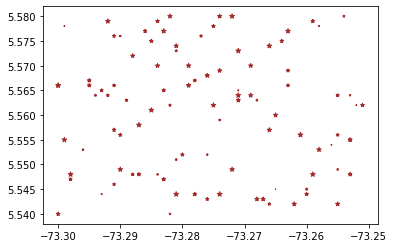

In [ ]:
# Asignar al gráfico una forma al punto de acuerdo con el LST(graficar)
plt.scatter(df1['Lat'],df1['Long'], marker="*",color="BROWN",s=df1["LST"])
plt.show()

Aquí se cambio la forma de los puntos por estrellas de tonalidad cafe.

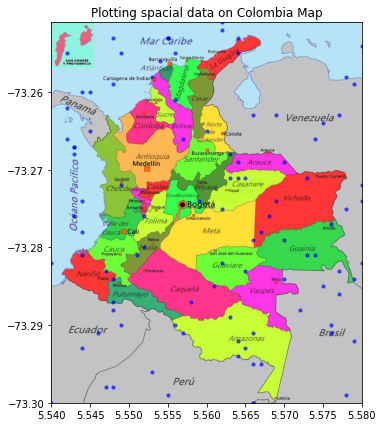

In [ ]:
# Buscar alguna librería o programa(en última opción) que permita visualizar los puntos en el mapa de Colombia (¿están todos los puntos en Colombia? ¿pertenecen los puntos a alguna región específica de Colombia? ¿están todos los puntos dentro de esa región? Si alguno se sale de esa región (departamento), decartarlo y volver a graficar.
# Puntos sobre el mapa de Colombia
SM=(df1.Long.min(),df1.Long.max(),
    df1.Lat.min(),df1.Lat.max())
MP=plt.imread("/content/mapa1.jpg")
fig,ax=plt.subplots(figsize=(8,7))
ax.scatter(df1.Long,df1.Lat,zorder=1,alpha=0.6,c="b",s=10)
ax.set_title("Plotting spacial data on Colombia Map")
ax.set_xlim(SM[0],SM[1])
ax.set_ylim(SM[2],SM[3])
ax.imshow(MP,zorder=0,extent=SM,aspect="equal")
# Borrando puntos 
mapa= folium.Map(location=[4.570868,-74.297333], zoom_start=6, control_scale= True)
for i in range(len(df1["Lat"])):
  folium.Marker(
      location=[df1["Long"][i],df1["Lat"][i]],
      popup=f'Long:{df1["Long"][i]},lat:{df1["Lat"][i]}',
      icon=folium.Icon()                                       
  ).add_to(mapa)
mapa

Text(0.5, 1.0, 'Boxplot de SMI')

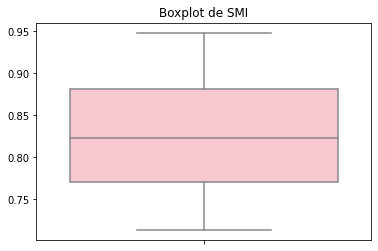

In [ ]:
# Realice un boxplot para SMI
sns.boxplot(data=df1,y=SMI,color="pink")
plt.title("Boxplot de SMI")

En este boxplot podemos apreciar que la media de SMI, es un valor cercano a 0.85, pero no es 0.85, así mismo no se observa ningún valor atípico.

Text(0.5, 1.0, 'Histograma de NDVI')

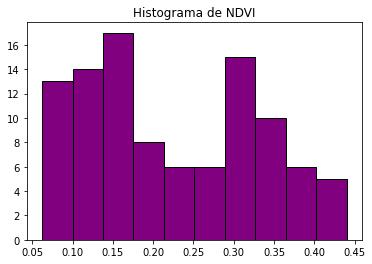

In [ ]:
# Realice un histograma para NDVI
plt.hist(df1["NDVI"],color="purple",ec="black")
plt.title("Histograma de NDVI")

Este histograma de NDVI, muestra una distribución similar en los datos, donde en 0.40 se alcanza el valor más bajo,3, sin embargo en 0.30 el valor mas alto con 12.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Densidad de LST')

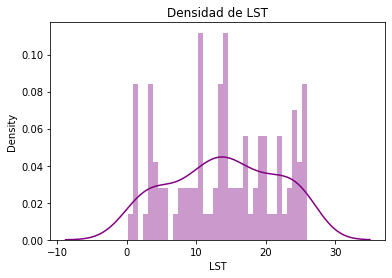

In [ ]:
# Grafique la densidad para LST
sns.distplot(df1["LST"], hist=True,kde=True,bins=int(180/5),color="purple",)
plt.title("Densidad de LST")

In [ ]:
from numpy.core.fromnumeric import mean
# Calcule estadísticas descriptivas para las 3 variables
# Medias
Media_SMI=mean(df1["SMI"])
print(Media_SMI)
Media_NDVI=mean(df1["NDVI"])
print(Media_NDVI)
Media_LST=mean(df1["LST"])
print(Media_LST)
# Varianzas
Var_SMI=df1["SMI"].var()
print(Var_SMI)
Var_NDVI=df1["NDVI"].var()
print(Var_NDVI)
Var_LST=df1["LST"].var()
print(Var_LST)
# Desviación estandar 
SD_SMI=df1["SMI"].std()
print(SD_SMI)
SD_NDVI=df1["NDVI"].std()
print(SD_NDVI)
SD_LST=df1["LST"].std()
print(SD_LST)
# Mediana
median_SMI = np.percentile(df1["SMI"], 50) 
print(median_SMI)
median_NDVI = np.percentile(df1["NDVI"], 50) 
print(median_NDVI)
median_LST = np.percentile(df1["LST"], 50) 
print(median_LST)

0.8251468587742914
0.2223960592254429
13.92653678170049
0.004407825589585686
0.01152357545743633
57.014986776735476
0.06639145720336077
0.10734791780671077
7.550826893575
0.8226400810770675
0.2045119036105308
14.114751706505501


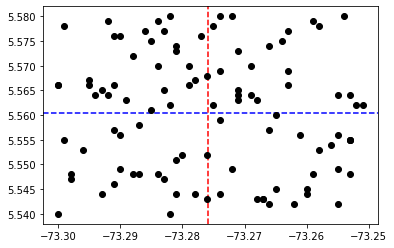

In [ ]:
# Fraccione los datos de latitud en 4 cuadrantes y etiquete los puntos como (I,II,II y IV) según el cuadrante y cree esta nueva variable(cuadrante como tipo factor o cadena) y calcule las estadísticas descriptivas por cuadrante
Long_mean=np.mean(df1["Long"])
Lat_mean=np.mean(df1["Lat"])
plt.axhline(y=Long_mean,color="blue",linestyle="--")
plt.axvline(x=Lat_mean,color="red",linestyle="--")
plt.plot(xy['Lat'],xy['Long'],"bo",color="black")
plt.show()

In [ ]:
Long_mean=np.mean(df1["Long"])
Lat_mean=np.mean(df1["Lat"])
Cuadrante=[]
for i in range(len(df1["Long"])):
  if df1["Long"][i]<Long_mean and df1["Lat"][i]<Lat_mean:
    Cuadrante.append("III")
  elif df1["Long"][i]>Long_mean and df1["Lat"][i]<Lat_mean:
    Cuadrante.append("II")
  elif df1["Long"][i]<Long_mean and df1["Lat"][i]>Lat_mean:
      Cuadrante.append("I")
  elif df1["Long"][i]>Long_mean and df1["Lat"][i]>Lat_mean:
      Cuadrante.append("IV")
  else:
    break
df3=pd.DataFrame({'Cuadrante':Cuadrante,
                    'Lat': Latitude, 
                    'Long': Longitude,
                    'SMI':SMI,
                    'NDVI':NDVI,
                    'LST':LST})
print(df3.head())

  Cuadrante     Lat   Long       SMI      NDVI       LST
0        IV -73.258  5.578  0.723695  0.074925  1.063320
1        IV -73.252  5.562  0.720331  0.066104  1.031056
2         I -73.265  5.545  0.713505  0.077772  0.185204
3         I -73.256  5.554  0.712794  0.062341  0.962639
4        II -73.299  5.578  0.715849  0.077513  1.021321


In [ ]:
# Calcule estadísticas descriptivas para los 4 cuadrantes 
# Medias
Media_C1=mean(df3.loc[df3["Cuadrante"]=="I"])
print(Media_C1)
Media_C2=mean(df3.loc[df3["Cuadrante"]=="II"])
print(Media_C2)
Media_C3=mean(df3.loc[df3["Cuadrante"]=="III"])
print(Media_C3)
Media_C4=mean(df3.loc[df3["Cuadrante"]=="IV"])
print(Media_C4)
# Varianzas
Var_C1=(df3.loc[df3["Cuadrante"]=="I"]).var
print(Var_C1)
Var_C2=(df3.loc[df3["Cuadrante"]=="II"]).var
print(Var_C2)
Var_C3=(df3.loc[df3["Cuadrante"]=="III"]).var
print(Var_C3)
Var_C4=(df3.loc[df3["Cuadrante"]=="IV"]).var
print(Var_C4)
# Desviación estandar 
SD_C1=(df3.loc[df3["Cuadrante"]=="I"]).std
print(SD_C1)
SD_C2=(df3.loc[df3["Cuadrante"]=="II"]).std()
print(SD_C2)
SD_C3=(df3.loc[df3["Cuadrante"]=="III"]).std()
print(SD_C3)
SD_C4=(df3.loc[df3["Cuadrante"]=="IV"]).std()
print(SD_C4)

Lat    -73.261542
Long     5.549458
SMI      0.830240
NDVI     0.236980
LST     14.476437
dtype: float64
Lat    -73.287133
Long     5.570267
SMI      0.828903
NDVI     0.232365
LST     14.048340
dtype: float64
Lat    -73.287682
Long     5.548636
SMI      0.819044
NDVI     0.184202
LST     12.742641
dtype: float64
Lat    -73.265042
Long     5.570042
SMI      0.820954
NDVI     0.230361
LST     14.309620
dtype: float64
<bound method NDFrame._add_numeric_operations.<locals>.var of    Cuadrante     Lat   Long       SMI      NDVI        LST
2          I -73.265  5.545  0.713505  0.077772   0.185204
3          I -73.256  5.554  0.712794  0.062341   0.962639
12         I -73.255  5.549  0.745692  0.096491   3.645888
14         I -73.274  5.559  0.751360  0.098078   4.332042
18         I -73.267  5.543  0.763015  0.104547  10.664590
19         I -73.266  5.542  0.772793  0.106120   8.675554
24         I -73.253  5.555  0.771152  0.236339   9.535938
33         I -73.260  5.545  0.786615  0.17249

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3370: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: FutureWarning: Dropping of nuisance

Text(0.5, 1.0, 'Boxplot de SMI 2')

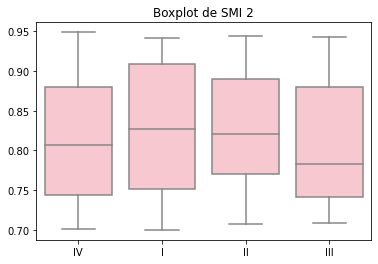

In [ ]:
# Realice un boxplot para SMI que muestre las cajas de los 4 cuadrantes en el mismo gráfico
sns.boxplot(data=df3,x=Cuadrante,y=SMI,color="pink")
plt.title("Boxplot de SMI 2")

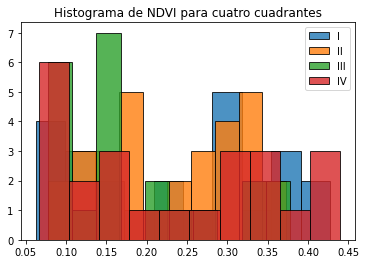

In [ ]:
# Realice un histograma múltiple para NDVI que los muestre para los 4 cuadrantes en el mismo gráfico (superponiendo los histogramas)
Serie1= (df3.loc[df3["Cuadrante"]=="I"])
Serie2= (df3.loc[df3["Cuadrante"]=="II"])
Serie3=(df3.loc[df3["Cuadrante"]=="III"])
Serie4=(df3.loc[df3["Cuadrante"]=="IV"])

plt.hist(Serie1['NDVI'],label="I",alpha=.8,edgecolor="black")
plt.hist(Serie2['NDVI'],label="II",alpha=.8,edgecolor="black")
plt.hist(Serie3['NDVI'],label="III",alpha=.8,edgecolor="black")
plt.hist(Serie4['NDVI'],label="IV",alpha=.8,edgecolor="black")

plt.title("Histograma de NDVI para cuatro cuadrantes")
plt.legend()
plt.show()

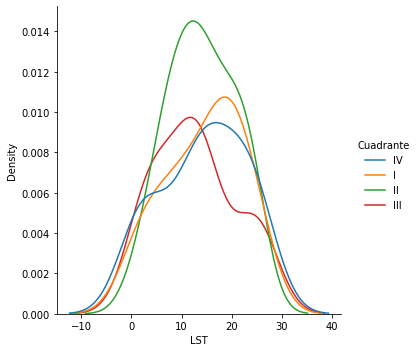

In [ ]:
# Realice un gráfico de densidades múltiple para LST que los muestre para los 4 cuadrantes en el mismo gráfico (superponiendo las densidades)
sns.displot(data=df3,x="LST",hue="Cuadrante",kind="kde")


In [ ]:
# Construya una matriz de correlaciones de Pearson para las 5 variables
Matriz_1=df3.corr()
Matriz_1

,Lat,Long,SMI,NDVI,LST
Lat,1.000000,-0.083395,-0.064169,-0.027667,-0.056889
Long,-0.083395,1.000000,0.084804,0.100789,0.082473
SMI,-0.064169,0.084804,1.000000,0.643670,0.767563
NDVI,-0.027667,0.100789,0.643670,1.000000,0.831621
LST,-0.056889,0.082473,0.767563,0.831621,1.000000


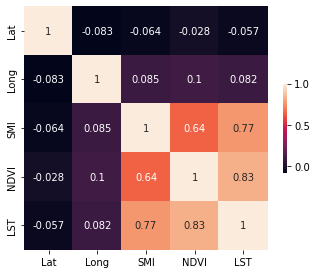

In [ ]:
# Realice un gráfico de correlaciones para las 5 variables
Matriz_1=df3.corr()
fig=plt.figure(figsize=[12,12])
ax1=fig.add_subplot(2,2,1)
sns.heatmap(Matriz_1, annot=True,ax=ax1,square=True,cbar_kws={"shrink":.3})

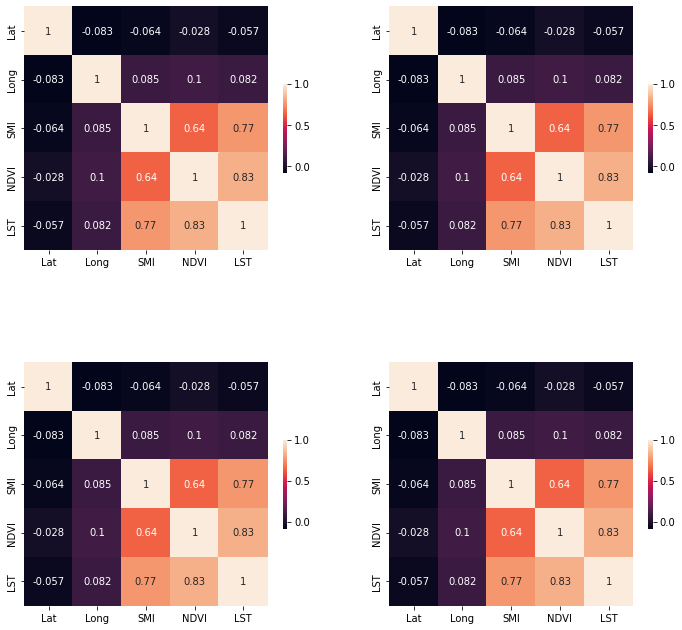

In [ ]:
# Fraccione el gráfico de correlaciones por cuadrante y muestre las 4 figuras en un solo gráfico
df4=df3.loc[df3["Cuadrante"]=="I"]
Matriz_4=df3.corr()
df5=df3.loc[df3["Cuadrante"]=="II"]
Matriz_5=df3.corr()
df6=df3.loc[df3["Cuadrante"]=="III"]
Matriz_6=df3.corr()
df7=df3.loc[df3["Cuadrante"]=="IV"]
Matriz_7=df3.corr()

fig=plt.figure(figsize=[12,12])
ax1=fig.add_subplot(2,2,1)
ax2=fig.add_subplot(2,2,2)
ax3=fig.add_subplot(2,2,3)
ax4=fig.add_subplot(2,2,4)

sns.heatmap(Matriz_4, annot=True,ax=ax1,square=True,cbar_kws={"shrink":.3})
sns.heatmap(Matriz_5, annot=True,ax=ax2,square=True,cbar_kws={"shrink":.3})
sns.heatmap(Matriz_6, annot=True,ax=ax3,square=True,cbar_kws={"shrink":.3})
sns.heatmap(Matriz_7, annot=True,ax=ax4,square=True,cbar_kws={"shrink":.3})

In [ ]:
#Ajuste algún modelo de regresión lineal simple entre el NDVI (respuesta) y el LST
y = df1['NDVI'] #variable dependiente 
x = df1['LST'] #Varible independiente
X = sm.add_constant(x)
lm = (sm.OLS(y, X)).fit()
model_summary = lm.summary()
print(model_summary)

                            OLS Regression Results                            
Dep. Variable:                   NDVI   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.688
Method:                 Least Squares   F-statistic:                     219.8
Date:                Wed, 09 Feb 2022   Prob (F-statistic):           8.92e-27
Time:                        18:24:52   Log-Likelihood:                 140.59
No. Observations:                 100   AIC:                            -277.2
Df Residuals:                      98   BIC:                            -272.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0577      0.013      4.576      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


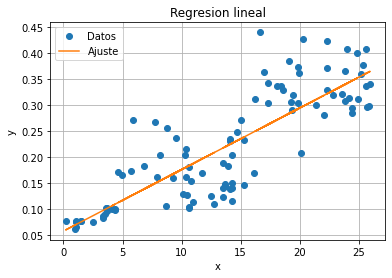

In [ ]:
#Ajuste algún modelo de regresión lineal simple entre el NDVI (respuesta) y el LST
x = (LST)
y = (NDVI)
n = len(x)
x =np.array(x)
y = np.array(y)
sumx = sum(x)
sumy = sum(y)
sumx2 = sum(x*x)
sumy2 = sum(y*y)
sumxy = sum(x*y)
promx= sumx/n
promy= sumy/n
m=(sumx*sumy - n*sumxy)/(sumx**2 - n*sumx2)
b= promy - m*promx
plt.plot(x, y, 'o', label= 'Datos')
plt.plot(x, m*x + b, label = 'Ajuste')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Regresion lineal')
plt.grid()
plt.legend()
plt.show()

In [ ]:
#Ajuste un modelo de regresión multiple entre NDVI (respuesta) con LST y SMI
Multiple = smf.ols("NDVI ~ LST + SMI",df1)
result= Multiple.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   NDVI   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.732
Method:                 Least Squares   F-statistic:                     136.0
Date:                Wed, 09 Feb 2022   Prob (F-statistic):           7.29e-29
Time:                        19:53:43   Log-Likelihood:                 146.74
No. Observations:                 100   AIC:                            -287.5
Df Residuals:                      97   BIC:                            -279.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2494      0.071     -3.489      0.001      -0.391      -0.108
LST            0.0083      0.001      8.870      0.000       0.006       0.010
SMI            0.5061      0.095      5.343      0.000       0.318       0.694
==============================================================================
Omnibus:                        1.602   Durbin-Watson:                   1.469
Prob(Omnibus):                  0.449   Jarque-Bera (JB):                1.050
Skew:                           0.159   Prob(JB):                        0.592
Kurtosis:                       3.389   Cond. No.                         301.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#Tome una muestra del 80% del data.frame y calcule la matriz de correlaciones por cuadrante. Compare con el caso de todos los datos.
muestra_xy = df1.sample(80)
muestra_xy.corr()
mc= muestra_xy.corr()
mc.style.background_gradient (cmap = 'coolwarm')
print(muestra_xy)

       Lat   Long       SMI      NDVI        LST
24 -73.253  5.555  0.771152  0.236339   9.535938
50 -73.291  5.557  0.918267  0.138989  14.137679
77 -73.266  5.557  0.882951  0.383978  19.107799
28 -73.283  5.565  0.772617  0.125228  12.456085
87 -73.275  5.562  0.841889  0.423221  22.331161
..     ...    ...       ...       ...        ...
11 -73.296  5.553  0.745526  0.102421   3.612476
81 -73.285  5.561  0.797577  0.321630  23.559755
97 -73.274  5.544  0.894869  0.296572  25.737076
43 -73.275  5.578  0.930147  0.124015  13.541814
13 -73.282  5.540  0.747015  0.101538   3.698468

[80 rows x 5 columns]


In [ ]:
muestra_xy.corr()
mc= muestra_xy.corr()
mc.style.background_gradient (cmap = 'coolwarm')

,Lat,Long,SMI,NDVI,LST
Lat,1.000000,-0.096077,-0.009711,-0.029222,-0.063087
Long,-0.096077,1.000000,0.065759,0.105393,0.070408
SMI,-0.009711,0.065759,1.000000,0.657648,0.766591
NDVI,-0.029222,0.105393,0.657648,1.000000,0.821695
LST,-0.063087,0.070408,0.766591,0.821695,1.000000


Text(0.5, 0, 'LST')

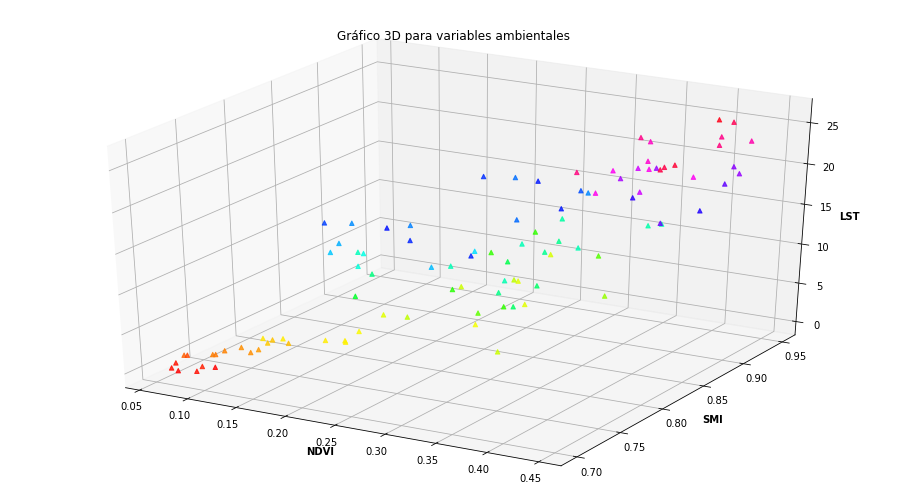

In [ ]:
#Haga un gráfico 3D para las 3 variables ambientales
z = df1.LST
x = df1.NDVI
y = df1.SMI
 
fig = plt.figure(figsize = (16, 9))
ax = plt.axes(projection ="3d")
   
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.3,
        alpha = 0.2)
 

my_cmap = plt.get_cmap('hsv')
 
sctt = ax.scatter3D(x, y, z,
                    alpha = 0.8,
                    c = (x + y + z),
                    cmap = my_cmap,
                    marker ='^')
 
plt.title("Gráfico 3D para variables ambientales")
ax.set_xlabel('NDVI', fontweight ='bold')
ax.set_ylabel('SMI', fontweight ='bold')
ax.set_zlabel('LST', fontweight ='bold')

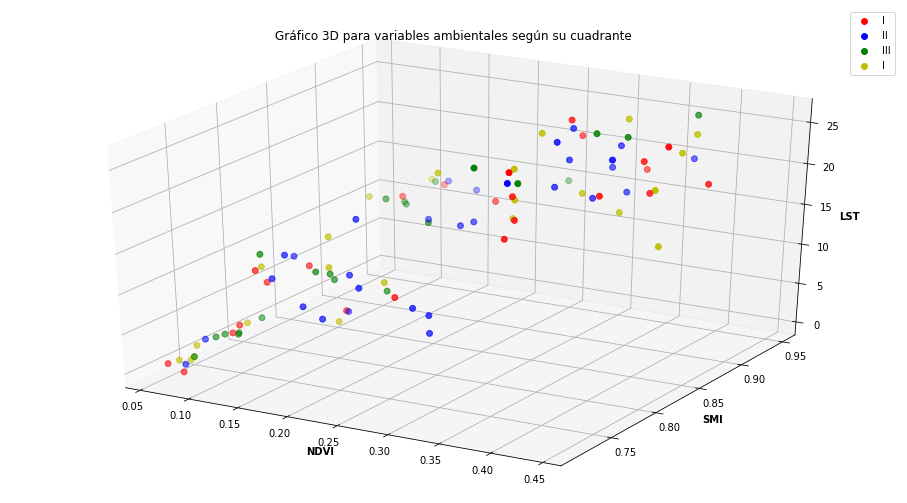

In [101]:
#Haga un gráfico 3D para las 3 variables ambientales y asigne color según cuadrante
Serie_1= (df3.loc[df3["Cuadrante"]=="I"])
Serie_2= (df3.loc[df3["Cuadrante"]=="II"])
Serie_3=(df3.loc[df3["Cuadrante"]=="III"])
Serie_4=(df3.loc[df3["Cuadrante"]=="IV"])
fig = plt.figure(figsize = (16, 9))

ax = fig.add_subplot(111,projection='3d')


ax.scatter(Serie_1["NDVI"],Serie_1["SMI"],Serie_1["LST"],c='r',marker='o',s=35,label='I')
ax.scatter(Serie_2["NDVI"],Serie_2["SMI"],Serie_2["LST"],c='b',marker='o',s=35,label='II')
ax.scatter(Serie_3["NDVI"],Serie_3["SMI"],Serie_3["LST"],c='g',marker='o',s=35,label='III')
ax.scatter(Serie_4["NDVI"],Serie_4["SMI"],Serie_4["LST"],c='y',marker='o',s=35,label='I')

plt.title("Gráfico 3D para variables ambientales según su cuadrante")
ax.set_xlabel('NDVI', fontweight ='bold')
ax.set_ylabel('SMI', fontweight ='bold')
ax.set_zlabel('LST', fontweight ='bold')


ax.legend(scatterpoints=1)
plt.show()

In [ ]:
#Investigue como se construye una matriz de distancias entre todos las coordenadas
df_array=df1[["Long","Lat"]].to_numpy()
dist_mat=cdist(df_array,df_array,"euclidean")
df4=pd.DataFrame(dist_mat,columns=df1["Posición"],index=df1["Posición"])
print(df4)

Posición        0         1         2   ...        97        98        99
Posición                                ...                              
0         0.000000  0.026476  0.023537  ...  0.017720  0.019000  0.030414
1         0.026476  0.000000  0.003000  ...  0.024187  0.035384  0.009055
2         0.023537  0.003000  0.000000  ...  0.021633  0.033242  0.009849
3         0.024166  0.006403  0.005099  ...  0.018385  0.036401  0.006403
4         0.017117  0.011402  0.009220  ...  0.022472  0.024042  0.018868
...            ...       ...       ...  ...       ...       ...       ...
95        0.015033  0.032016  0.029732  ...  0.032249  0.004123  0.038949
96        0.016125  0.031890  0.029698  ...  0.033136  0.003606  0.039051
97        0.017720  0.024187  0.021633  ...  0.000000  0.036346  0.022204
98        0.019000  0.035384  0.033242  ...  0.036346  0.000000  0.042638
99        0.030414  0.009055  0.009849  ...  0.022204  0.042638  0.000000

[100 rows x 100 columns]


In [ ]:
#Máxima distancia de matriz
func = []
for i in range(100):
  func.append(max(dist_mat[i]))
max(func)
radius=max(func)*2/3
print(radius)

0.03773592452835953


(5.560900000000008, -73.27470999999987)


<function matplotlib.pyplot.show>

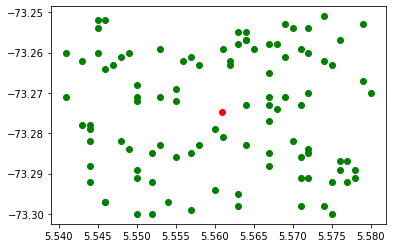

In [ ]:
#Ubique el centroide de toda la nube de puntos de coordenadas y seleccione solo puntos en una ventana de radio a lo sumo igual a 2/3 de la máxima distancia en la matriz de distancias
def Centroid(dist_mat):
  length=df_array.shape[0]
  sum_x=np.sum(df_array[:,0])
  sum_y=np.sum(df_array[:,1])
  return sum_x/length,sum_y/length
centroide= Centroid(np.array(dist_mat))
print(centroide)

plt.plot(df1['Long'],df1['Lat'],"go")
plt.scatter(centroide[0],centroide[1],c="r")
plt.show

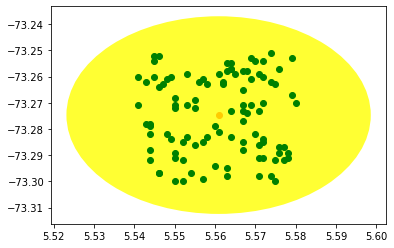

In [ ]:
# Calcule estadísticas descriptivas en esta ventana circular (dibuje la ventana) y asigne un color diferente a los puntos dentro de esta ventana

fig, ax = plt.subplots()
ax.plot(df1["Long"], df1["Lat"], "go")
plt.scatter(centroide[0], centroide[1], c="r")
circle = plt.Circle((centroide[0], centroide[1]),radius, alpha=0.8, fc='yellow')
ax.add_patch(circle)

In [ ]:
#Suponga que queremos hacer un análisis de varianza para comparar la media de SMI por cuadrante. Se pide primero tomar aleatoriamente 10 datos de cada cuadrante y construirun nuevo data.frame con todas las variables pero solo con 40 filas. Utilice el análisis de varianza (modulo pingouin si desea) para comparar el índice medio de los 4 cuadrantes.
mod=ols("SMI~ Cuadrante",
        data=df4).fit()
aov_table=sm.stats.anova_lm(mod,typ=2)
print(aov_table)

             sum_sq    df         F    PR(>F)
Cuadrante  0.005174   3.0  0.285817  0.835534
Residual   0.579249  96.0       NaN       NaN


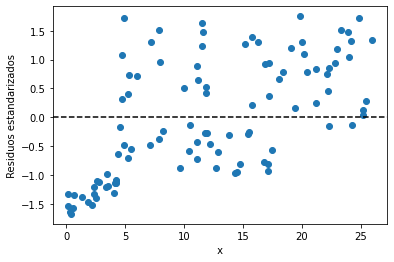

In [ ]:
#Use alguna librería que permita extraer los residuales del modelo y haga su histograma
# crear instancia de influencia
influencia = mod.get_influence ()

#obtener residuos estandarizados 
standardized_residuals = influencia. resid_studentized_internal

#display impresión de residuos
(standardized_residuals)

plt.scatter(df1["LST"], standardized_residuals)
plt. xlabel (' x ')
plt. ylabel (' Residuos estandarizados ')
plt.axhline(y = 0, color = 'black', linestyle = '--')
plt.show()
#De los resultados podemos ver que ninguno de los residuales estandarizados excede un valor absoluto de 3. Por lo tanto, ninguna de las observaciones parece ser un valor atípico.

In [96]:
#Utilice la prueba de Shapiro para probar normalidad en los residuales
stat,p =shapiro(standardized_residuals)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p>alpha:
	print('No se rechaza H0, hay normalidad en los residuales)')
else:
	print('Se rechaza H0, no hay normalidad en los residuales)')

Statistics=0.944, p=0.000
Se rechaza H0, no hay normalidad en los residuales)


In [100]:
#Utilice la prueba de Levene para probar igualdad de varianzas de los residuales
res=stat()
stat.levene(standardized_residuals)
res.levene_summary

AttributeError: ignored

In [ ]:
#Investigue como se calcula el índice de Moran y pruebe si los residuales muestran dependencia atribuible a la autocorrelación espacial entre ellos.